In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 

In [6]:
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}

In [7]:
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Radar chart of latent abilities

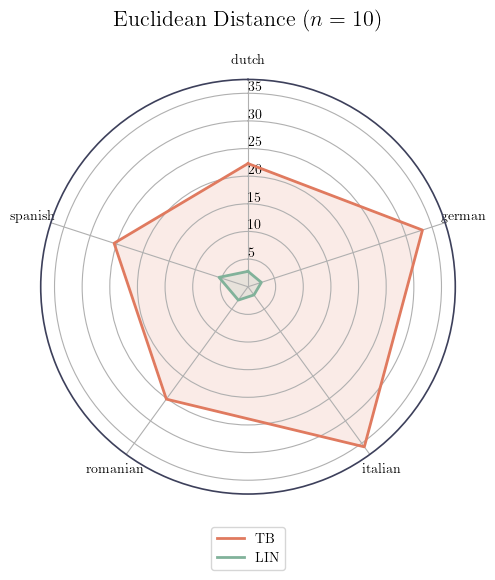

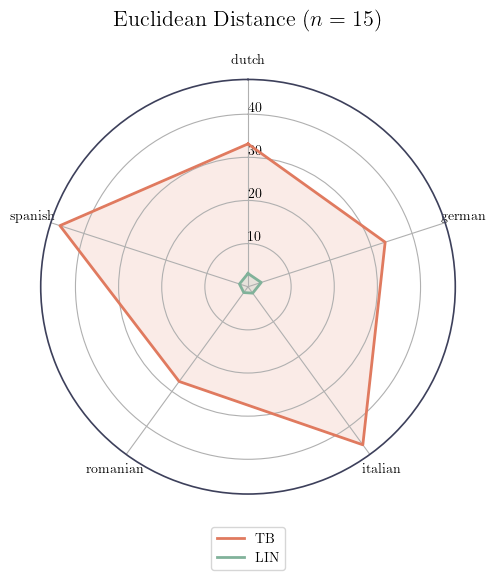

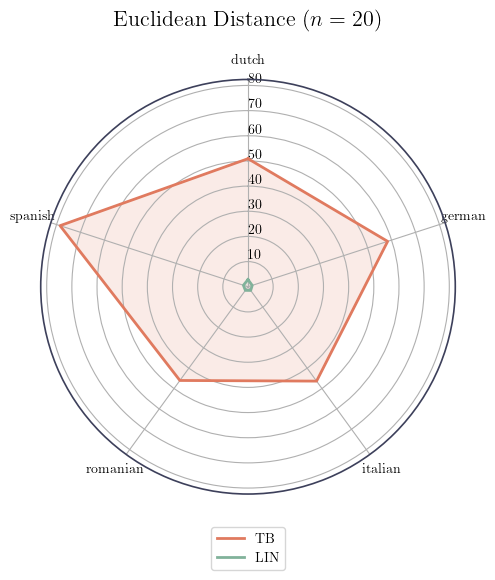

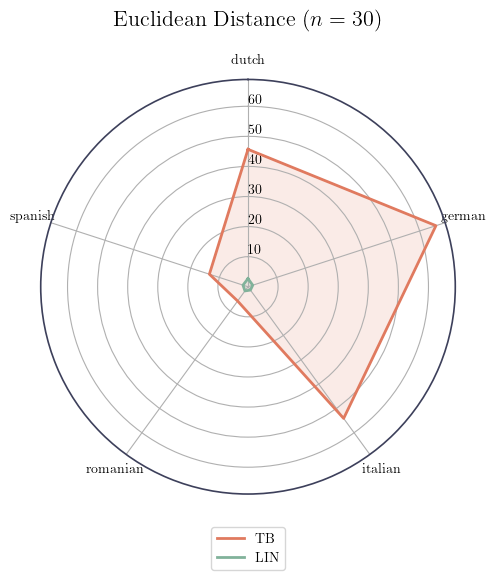

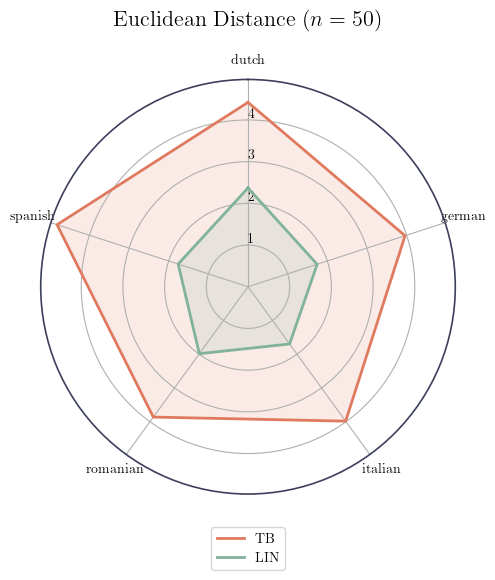

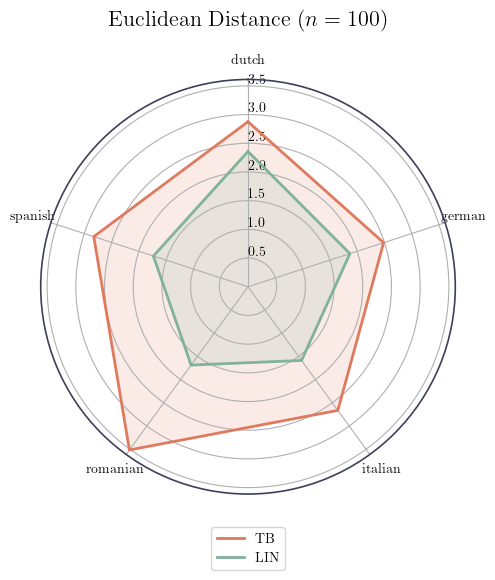

In [8]:

# ------------------------------------------------------------------------
# Read the CSV data
# ------------------------------------------------------------------------
df = pd.read_csv("data/comparison_latent_abilities.csv")

# Ensure a consistent order of languages (if desired)
languages = ["dutch", "german", "italian", "romanian", "spanish"]

# Sort the DataFrame by 'clusters' and then by your language list
df["lang"] = pd.Categorical(df["lang"], categories=languages, ordered=True)
df.sort_values(by=["clusters", "lang"], inplace=True)

# Get unique cluster sizes
cluster_values = df["clusters"].unique()

# ------------------------------------------------------------------------
# Helper function to create a radar chart
# ------------------------------------------------------------------------
def create_radar_chart(
    title,
    categories,
    values1,
    values2,
    label1,
    label2,
    color1,
    color2
):
    """
    Creates a radar chart with two sets of values (values1, values2).
    categories: list of strings (e.g. languages)
    values1, values2: arrays/lists of the same length as categories
    label1, label2: legend labels
    color1, color2: colors for the radar lines
    """
    # Number of variables
    N = len(categories)
    
    # Compute angle for each category
    # We go 0 -> 2*pi, and repeat the first angle to close the polygon
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    # Radar plots are typically done with a polar projection
    fig, ax = plt.subplots(
        figsize=(6, 6),
        subplot_kw=dict(polar=True)
    )
    
    # -- Plot for values1 --
    v1 = np.concatenate((values1, [values1[0]]))
    ax.plot(angles, v1, color=color1, linewidth=2, label=label1)
    ax.fill(angles, v1, color=color1, alpha=0.15)
    
    # -- Plot for values2 --
    v2 = np.concatenate((values2, [values2[0]]))
    ax.plot(angles, v2, color=color2, linewidth=2, label=label2)
    ax.fill(angles, v2, color=color2, alpha=0.15)

    # Set the category labels around the circle (in degrees)
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, categories)

    # Some styling
    ax.set_title(title, fontsize=16, pad=20)
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2))
    ax.set_theta_offset(np.pi / 2)    # Start from the top
    ax.set_theta_direction(-1)       # Clockwise labels
    
    # Remove radial labels (or customize as you wish)
    ax.set_rlabel_position(0)  # angle for radial labels
    ax.spines["polar"].set_color(color_dict["Delft Blue"])
    ax.spines["polar"].set_linewidth(1.2)
    
    plt.tight_layout()
    plt.show()

    # save as pdf
    filename = title.replace(" ", "_").lower().replace("(", "").replace(")", "").replace('$', '')
    fig.savefig(f"figures/{filename}.pdf", bbox_inches="tight")

# ------------------------------------------------------------------------
# Create one radar chart per cluster size for Euclidean and Cosine
# ------------------------------------------------------------------------
for cval in cluster_values:
    # Subset DataFrame for the current cluster value
    subset = df[df["clusters"] == cval]
    subset = subset.set_index("lang").reindex(languages)
    
    # Extract Euclidean data
    eucl_tb = subset["error_tb_eucl"].values
    eucl_lin = subset["error_lin_eucl"].values
    
    # Radar chart for Euclidean distance
    create_radar_chart(
        title=rf"Euclidean Distance ($n={cval}$)",
        categories=languages,
        values1=eucl_tb,
        values2=eucl_lin,
        label1="TB",
        label2="LIN",
        color1=color_dict["Burnt sienna"],
        color2=color_dict["Cambridge blue"]
    )
    
    # # Extract Cosine data
    # cos_tb = subset["cosine_tb"].values
    # cos_lin = subset["cosine_lin"].values
    
    # # Radar chart for Cosine similarity
    # create_radar_chart(
    #     title=rf"Cosine Similarity (n={cval})",
    #     categories=languages,
    #     values1=cos_tb,
    #     values2=cos_lin,
    #     label1="TB (Cosine)",
    #     label2="LIN (Cosine)",
    #     color1=color_dict["Delft Blue"],
    #     color2=color_dict["Sunset"]
    # )
